# NAME:SHAHD LOAI MOHAMED RWABDH.

# Importing libraries
Import the necessary libraries for data analysis and model building.

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


# Reading the Data
We read the training and test datasets from CSV files using pandas.


In [6]:
read_Tdata =pd.read_csv('/kaggle/input/just-ai-249-machine-learning-lab-competition/spambase_train.csv')
read_TSdata = pd.read_csv('/kaggle/input/just-ai-249-machine-learning-lab-competition/spambase_test.csv')


# Processing the Data
prepared the data by removing unnecessary columns and setting up the feature set and target variable.

In [7]:
# Dropping unnecessary columns 'ID' and 'spam' from the training data to get the feature set

x = read_Tdata.drop(columns=['spam', 'ID'])
y = read_Tdata['spam']
# Dropping the unnecessary column 'ID' from the test data to get the feature set
x_t = read_TSdata.drop(columns=['ID'])


# Splitting the Data
split the data into training and validation sets using train_test_split.

In [8]:
XT_split, XV_split, yt_split, yv_split = train_test_split(x, y, test_size=0.2, random_state=42)


# Building and Training the Model
used Support Vector Machine (SVM) with a linear kernel to build and train the model.

In [9]:
model = svm.SVC(kernel='linear', random_state=42)
model.fit(XT_split, yt_split)

SVC(kernel='linear', random_state=42)

# Evaluating the Model
evaluated the model's performance by predicting the validation data, calculating accuracy, and generating a classification report.

In [10]:
# Predicting the validation data and calculating the accuracy of the model
yv_prediction = model.predict(XV_split)
val_accuracy = accuracy_score(yv_split, yv_prediction)
print("Accuracy in SVM:", val_accuracy)
# Displaying the classification report including precision, recall, and F1-score
print("Report:\n", classification_report(yv_split, yv_prediction))

Accuracy in SVM: 0.9409937888198758
Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       404
           1       0.93      0.91      0.92       240

    accuracy                           0.94       644
   macro avg       0.94      0.94      0.94       644
weighted avg       0.94      0.94      0.94       644



# Predicting the New Data
used the trained model to predict the test data.

In [11]:
y_pred = model.predict(x_t)


# Creating the Submission File
created a CSV file containing the final predictions.

In [12]:
submission_dw = pd.DataFrame({'ID': read_TSdata['ID'], 'spam': y_pred})
submission_dw.to_csv('ssss.csv', index=False)
submission_dw


ID  spam
0     1981     0
1     1940     0
2     4260     1
3     3200     1
4     3082     1
...    ...   ...
1376  2757     1
1377  1986     0
1378  2972     0
1379  3568     1
1380  1310     0

[1381 rows x 2 columns]

# PLOT CHART

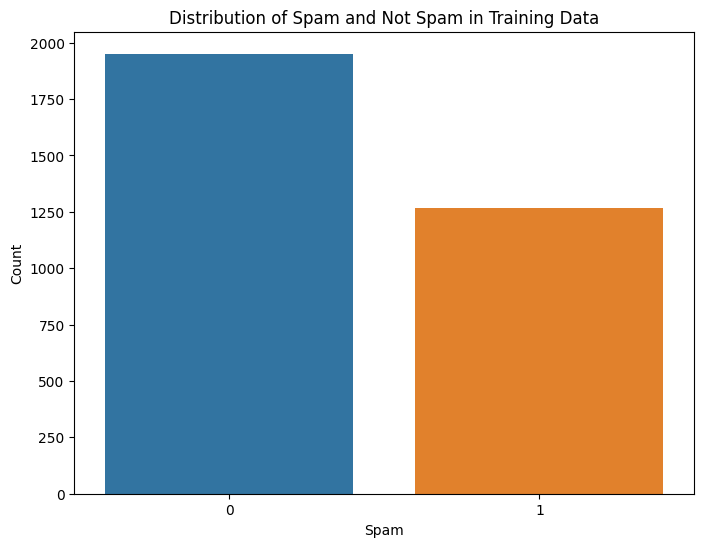

In [14]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='spam', data=read_Tdata)
plt.title('Distribution of Spam and Not Spam in Training Data')
plt.xlabel('Spam')
plt.ylabel('Count')
plt.show()